In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import time
import numpy as np

2024-08-22 16:02:41.306710: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images_f = train_images.reshape((60000, 28 * 28))
train_images_f = train_images_f.astype("float32") / 255
test_images_f = test_images.reshape((10000, 28 * 28))
test_images_f = test_images_f.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [5]:
model.fit(train_images_f, train_labels,
          epochs=5,
          batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8748 - loss: 0.4388
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9650 - loss: 0.1178
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9792 - loss: 0.0719
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9846 - loss: 0.0528
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9889 - loss: 0.0383


In [6]:
test_digits = test_images_f[0:10]
predictions = model.predict(test_digits)

# predictions[0]
# predictions[0].argmax()
# test_labels[0]

test_loss, test_acc = model.evaluate(test_images_f, test_labels)
print(f"test acc: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9752 - loss: 0.0752
test acc: 0.9799000024795532


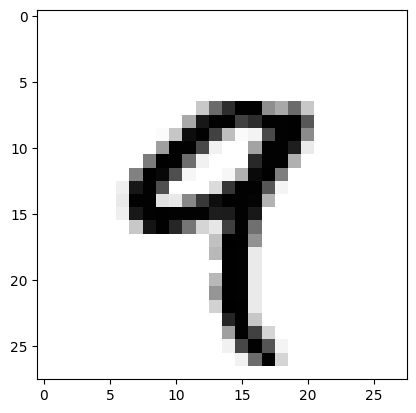

In [7]:
# train_images.ndim
# train_images.shape
# train_images.dtype

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
## tensor ops
# specify all dimensions explicitly, : means entire axis
my_slice = train_images[10:100, :, :]

# by convention, axis 0 of a tensor is "samples axis"/"samples dimension"
# so dimensions 2D tensors : (samples, features)
# dimensions 3D tensors, eg. timeseries : (samples, timesteps, features)

## batches
first_batch = train_images[:128]
second_batch = train_images[128:256]

n = 3
batch = train_images[128 * n:128 * (n + 1)]

In [9]:
# naive implementation of RELU
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Naive took: {0:.2f} s".format(time.time() - t0))

# compared to built-in np.maximum()
t0 = time.time()
for _ in range(1000):
    z=x+y
    z = np.maximum(z, 0.)
print("NumPy took: {0:.2f} s".format(time.time() - t0))


Naive took: 1.60 s
NumPy took: 0.00 s


In [10]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
            num_words=10000)

In [11]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
imdb.load_data()



((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

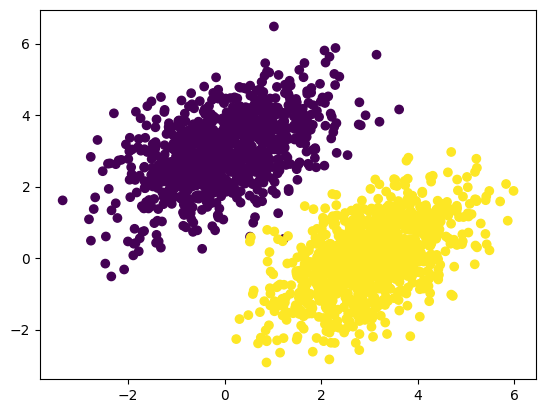

Loss at step 0: 4.4024
Loss at step 1: 0.7109
Loss at step 2: 0.2206
Loss at step 3: 0.1458
Loss at step 4: 0.1277
Loss at step 5: 0.1178
Loss at step 6: 0.1096
Loss at step 7: 0.1023
Loss at step 8: 0.0956
Loss at step 9: 0.0895
Loss at step 10: 0.0839
Loss at step 11: 0.0788
Loss at step 12: 0.0741
Loss at step 13: 0.0698
Loss at step 14: 0.0659
Loss at step 15: 0.0624
Loss at step 16: 0.0591
Loss at step 17: 0.0561
Loss at step 18: 0.0533
Loss at step 19: 0.0508
Loss at step 20: 0.0485
Loss at step 21: 0.0464
Loss at step 22: 0.0445
Loss at step 23: 0.0428
Loss at step 24: 0.0412
Loss at step 25: 0.0397
Loss at step 26: 0.0383
Loss at step 27: 0.0371
Loss at step 28: 0.0360
Loss at step 29: 0.0350
Loss at step 30: 0.0340
Loss at step 31: 0.0332
Loss at step 32: 0.0324
Loss at step 33: 0.0316
Loss at step 34: 0.0310
Loss at step 35: 0.0304
Loss at step 36: 0.0298
Loss at step 37: 0.0293
Loss at step 38: 0.0289
Loss at step 39: 0.0284


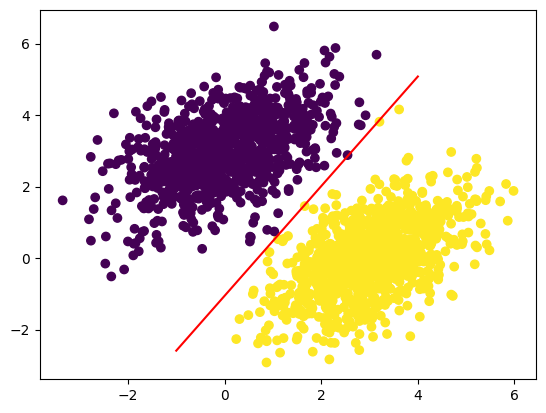

In [5]:
## A linear classifier in base TensorFlow (Deep Learning with Python 2e, pg.79)

# data: 2x 2D Gaussians
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 
                     np.ones((num_samples_per_class, 1), dtype="float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) 
plt.show()

input_dim = 2
output_dim = 1

# NOTE: TF tensors aren't assignable (DLP2e 77)
# this will fail:
# x = tf.ones(shape=(2, 2))
# x[0, 0] = 0.
# instead we use tf.Variable() to create the initial tensor
# then assign(), assign_add() or assign_sub() to change its value subsequently

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# forward pass fx
def model(inputs):
    return tf.matmul(inputs, W) + b

# MSE loss fx
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

# training step fx
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# batch training loop
# NOTE: this iterates over all data in the same batch, so each
# batch takes longer, we need fewer steps (only 40)
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 -b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)   